In [ ]:
!pip install tweepy
! pip install contractions
!pip install clean-text
!pip install spacy-langdetect
! pip install pyspellchecker

     |████████████████████████████████| 287 kB 34.5 MB/s 
     |████████████████████████████████| 106 kB 61.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 175 kB 53.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=168683575f4cb013b1282cd9c3636081bd33a22b655877ce6e082b749868126c
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 998 kB 12.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993431 sha256=d3a5ce34047579e2c39f8c3c0e20d3841e4d0acd62a5ff849cd4ed7ef0ad71b3
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect
     |████████████████████████████████| 2.7 MB 10.8 MB/s 


In [ ]:
import tweepy 
import pandas as pd
import contractions
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import re, string, unicodedata
import re
from cleantext import clean
import spacy
from spellchecker import SpellChecker
from spacy_langdetect import LanguageDetector
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)



Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:


api_key="E7zRIL7P0jLfB0PTcJb52DtVq"
api_Secret="G1908KNWKlTeu6M0bxhEtdwv5JPd2UR1i9xn1N3G3Fxe6lVNFv"
bearer_token="AAAAAAAAAAAAAAAAAAAAAHsuUQEAAAAABOhdFtgv%2BrQuW5IoM%2F0K748ulmI%3DordBWTnA0QozMXVEdA76Hrky7svHzh2oWg6SAv2YL9rRgE6M3C"
access_token="752206876201234432-rtIqu33zK0I6rJaxIMB2v46wH5fbMoq"
acess_token_Secret="IXgaFd3qQUrBVMPORIQJ52SwAIgEnI5rBGY1U9J6MplA4"


In [ ]:
auth = tweepy.OAuthHandler(api_key,api_Secret)
auth.set_access_token(access_token, acess_token_Secret)

api = tweepy.API(auth)

In [ ]:
#  for i in  tweepy.Cursor(api.user_timeline,id='BarackObama',tweet_mode='extended').items():
id,tweets_i,created_at,source,favorate_count,retweets_count,geologic,cordinates,hashtags=[],[],[],[],[],[],[],[],[]
for tweets in tweepy.Cursor(api.user_timeline,id='ShashiTharoor',tweet_mode='extended').items():
  # print(tweets.id)
  id.append(tweets.id)
  # print(tweets.full_text)
  tweets_i.append(tweets.full_text)
  # print(tweets.created_at)
  created_at.append(tweets.created_at)
  # print(tweets.source)
  source.append(tweets.source)
  # print(tweets.favorite_count)
  favorate_count.append(tweets.favorite_count)
  # print(tweets.retweet_count)
  retweets_count.append(tweets.retweet_count)
  # print(tweets.geo)
  geologic.append(tweets.geo)
  # print(tweets.entities["hashtags"])
  hashtags.append(tweets.entities["hashtags"])

In [ ]:

dict_data = {'ID':id,
             'Tweets':tweets_i,
             'Created_at':created_at,
             'Source':source,
             'Favorate Count':favorate_count,
             'Retweets Count':retweets_count,
             'Geographic Location':geologic,
             'Hashtags':hashtags} 

df = pd.DataFrame(dict_data )
df

,ID,Tweets,Created_at,Source,Favorate Count,Retweets Count,Geographic Location,Hashtags
0,1515310020308901892,"Pleased to honour Dr Harikrishnan PK, who has ...",2022-04-16 12:43:56,Twitter for iPhone,30,4,None,[]
1,1515309016486133760,“Meet the Public” sessions at the MP’s office ...,2022-04-16 12:39:57,Twitter for iPhone,33,6,None,[]
2,1515308332130586626,Thiruvananthapuram will host a Global Science ...,2022-04-16 12:37:14,Twitter for iPhone,58,5,None,[]
3,1515307726858973188,The Federation of Malayalee Associations of th...,2022-04-16 12:34:49,Twitter for iPhone,63,5,None,[]
4,1515306943182639109,Young Fayis Asraf Ali is looking for sponsors ...,2022-04-16 12:31:42,Twitter for iPhone,69,9,None,"[{'text': 'Ukraine', 'indices': [237, 245]}]"
...,...,...,...,...,...,...,...,...
3240,1440541975401295877,RT @MayaramArvind: ⁦@ShashiTharoor⁩ writes a s...,2021-09-22 05:02:25,Twitter Web App,0,14,None,[]
3241,1440541905834569737,RT @DipShyampukur: Very rare public assembly o...,2021-09-22 05:02:08,Twitter Web App,0,14,None,[]
3242,1440541031133372424,RT @crkesavan: Exactly a 100 years before on S...,2021-09-22 04:58:40,Twitter Web App,0,55,None,[]
3243,1440539984268726280,Amazing young girl! Will definitely connect wi...,2021-09-22 04:54:30,Twitter Web App,149,21,None,[]


In [ ]:
total_retweets=df["Retweets Count"].sum()
print("Total Retweets::",total_retweets)
Total_Favorate_Count=df["Favorate Count"].sum()
print("Total_Favorate_Count::",Total_Favorate_Count)
source_unique=df["Source"].unique()
print("Source Tweets::",source_unique[0])
print("               ",source_unique[1])
print("               ",source_unique[2])
print("               ",source_unique[3])
print("               ",source_unique[4])


Total Retweets:: 730534
Total_Favorate_Count:: 2615826
Source Tweets:: Twitter for iPhone
                Twitter Web App
                Twitter Media Studio
                Twitter for iPad
                Twitter for Android


In [ ]:
three_Day_tweets=df[df["Created_at"] > "2022-04-10 13:19:25" ]
three_Day_tweets

,ID,Tweets,Created_at,Source,Favorate Count,Retweets Count,Geographic Location,Hashtags
0,1515310020308901892,"Pleased to honour Dr Harikrishnan PK, who has ...",2022-04-16 12:43:56,Twitter for iPhone,30,4,None,[]
1,1515309016486133760,“Meet the Public” sessions at the MP’s office ...,2022-04-16 12:39:57,Twitter for iPhone,33,6,None,[]
2,1515308332130586626,Thiruvananthapuram will host a Global Science ...,2022-04-16 12:37:14,Twitter for iPhone,58,5,None,[]
3,1515307726858973188,The Federation of Malayalee Associations of th...,2022-04-16 12:34:49,Twitter for iPhone,63,5,None,[]
4,1515306943182639109,Young Fayis Asraf Ali is looking for sponsors ...,2022-04-16 12:31:42,Twitter for iPhone,69,9,None,"[{'text': 'Ukraine', 'indices': [237, 245]}]"
...,...,...,...,...,...,...,...,...
57,1513563962625130496,Inaugurated (in Thiruvananthapuram this evenin...,2022-04-11 17:05:44,Twitter for iPhone,238,30,None,[]
58,1513498015285547013,RT @ProfCong: Congratulations and best wishes ...,2022-04-11 12:43:40,Twitter for iPhone,0,32,None,[]
59,1513421005104246784,https://t.co/OrG0nfLL5R,2022-04-11 07:37:40,Twitter for iPhone,329,31,None,[]
60,1513413605613776898,My column in @mathrubhumieng supports my @INCI...,2022-04-11 07:08:16,Twitter Web App,309,56,None,[]


In [ ]:
df_first_3 = df.iloc[:45]
df_first_3

,ID,Tweets,Created_at,Source,Favorate Count,Retweets Count,Geographic Location,Hashtags
0,1514565152422903810,RT @KumarDheerenda: Would the honourable minis...,2022-04-14 11:24:06,Twitter Web App,0,22,None,[]
1,1514552941008789505,"As an MP, I get many requests from constituent...",2022-04-14 10:35:34,Twitter Web App,88,15,None,[]
2,1514485248062816258,https://t.co/tvyb0DQ8W9,2022-04-14 06:06:35,Twitter for iPhone,255,26,None,[]
3,1514484989018050560,https://t.co/RhkbX8vmw5,2022-04-14 06:05:33,Twitter for iPhone,414,31,None,[]
4,1514482592266915842,Speaking now #AmbedkarJayanti https://t.co/vCo...,2022-04-14 05:56:02,Twitter for iPhone,169,14,None,"[{'text': 'AmbedkarJayanti', 'indices': [13, 2..."
5,1514480727328718853,"Five years ago, I was interviewed on Dr Ambedk...",2022-04-14 05:48:37,Twitter Web App,161,19,None,[]
6,1514480369156112388,"As we celebrate #AmbedkarJayanti today, i look...",2022-04-14 05:47:12,Twitter Web App,273,48,None,"[{'text': 'AmbedkarJayanti', 'indices': [16, 3..."
7,1514473993436565510,"From the Jains, we get the idea of “anekantava...",2022-04-14 05:21:52,Twitter for iPhone,257,30,None,[]
8,1514456240406949888,Celebrating the founder of the Jain faith #Mah...,2022-04-14 04:11:19,Twitter for iPhone,1299,88,None,"[{'text': 'MahavirJayanti', 'indices': [42, 57]}]"
9,1514456014476652544,"This week: Happy Vaishakhi, Happy Bohag Bihu, ...",2022-04-14 04:10:25,Twitter for iPhone,454,46,None,[]


In [ ]:
print("Length of Tweets::",len(three_Day_tweets["Retweets Count"]))
total_retweets=three_Day_tweets["Retweets Count"].sum()
print("Total Retweets::",total_retweets)
Total_Favorate_Count=three_Day_tweets["Favorate Count"].sum()
print("Total_Favorate_Count::",Total_Favorate_Count)
source_unique=three_Day_tweets["Source"].unique()
source_unique
print("Source Tweets::",source_unique[0])
print("               ",source_unique[1])



Length of Tweets:: 62
Total Retweets:: 2708
Total_Favorate_Count:: 17693
Source Tweets:: Twitter for iPhone
                Twitter Web App


In [ ]:

# to remove URL
def clean_data(data):
  url=re.sub(r'https\S','',data)
  temp = re.sub(r"http\S+", "",  url)
  temp = re.sub(r"www.\S+", "", temp)
  hash1 = re.sub("@[A-Za-z0-9_]+","", temp)
  hash2 = re.sub("#[A-Za-z0-9_]+","", hash1)
  temp = re.sub('[()!?]', ' ', hash2)
  temp = re.sub('\[.*?\]',' ', temp)
  temp = re.sub("[0-9]"," ", temp)
  temp  = "".join([char for char in temp if char not in string.punctuation])
  temp = re.sub('[0-9]+', '', temp)
  
  temp=clean(temp, no_emoji=True)

  return(temp)

cleaned_data=[]
for i in df["Tweets"]:
  print("line::", clean_data(i))
  cleaned_data.append(clean_data(i))
 
df["Cleaned_data"]=cleaned_data



line:: pleased to honour dr harikrishnan pk who has just received his phd on inbound medical tourism from the university of kerala for what is almost certainly the first doctoral thesis on this subject anywhere in the country tcodcvxcym lp
line:: "meet the public" sessions at the mp's office cover a vast range of issues and requests i never cease to be amazed at the variety of subjects an indian mp is required to help his constituents on a privilege amp a challenge tcoqt retapm
line:: thiruvananthapuram will host a global science festival this year a terrific publicprivate partnership that promises to be both educational and entertaining tco nfj fb c
line:: the federation of malayalee associations of the americas has invited me to their annual reception i dare say there are more malayalee associations abroad than those of any other indian diaspora community tco ijdtimbk
line:: young fayis asraf ali is looking for sponsors for his world bicycle expedition kerala to london on two wheels 

In [ ]:
nltk.download('stopwords')
def check_lang(data):
   temp = nlp(data)
   temp=str(temp)
   temp=temp.lower()


   return(temp)

final_cleaned_texed=[]
for i in df["Cleaned_data"]:
  final_cleaned_texed.append(check_lang(i))


         

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
def stemming(data):
  # print("Input data::",data)
  temp= nltk.word_tokenize(data)
 
  stemmer = LancasterStemmer()
  stemmed = []
  for i in temp:
      stem = stemmer.stem(i)
      stemmed.append(stem)
    
  return stemmed

def stopword(data):
 
  clean = []
  for i in data:
    if i not in stopwords.words('english'):
      clean.append(i)
  return clean

cleared_text=[]
for i in final_cleaned_texed:
  cleared_text.append(stopword( stemming(i)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
final_tweets=[]
for i in cleared_text:
  temp=[]
  for j in range(0,len(i)):
    if len(i[j]) >2:
      temp.append(i[j])
  final_tweets.append(temp)
  


 


In [ ]:
from textblob import TextBlob
polarity=[]
comment_polarity=[]
def calculate_polarity(text):
  total_polarity=0
  word_polarity=[]
 
  for i,word in enumerate (text):
      polar=TextBlob(word).sentiment.polarity
      word_polarity.append(polar)
      total_polarity=polar+total_polarity
  
  return (total_polarity,word_polarity)


In [ ]:
for i,comments in enumerate(final_tweets):
    total,word=calculate_polarity(comments)
    polarity.append(total)
    comment_polarity.append(word)

In [ ]:
Y=[]
for i in polarity:
  if i >0:
    positive=1
    Y.append(positive)
  elif i == 0:
    neutral=0
    Y.append(neutral)
  elif i <0:
    negative=-1
    Y.append(negative)

In [ ]:
mySeries = pd.Series(Y)
mySeries.value_counts()

 0    1824
 1    1044
-1     377
dtype: int64

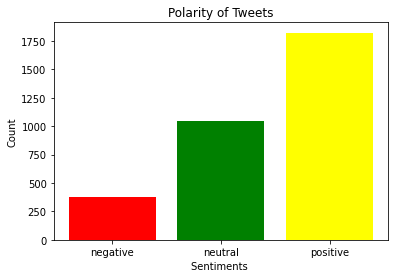

In [ ]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2, 3]
 
# heights of bars
height = [377, 1044, 1824]
 
# labels for bars
tick_label = ['negative', 'neutral', 'positive']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green',"yellow"])
 
# naming the x-axis
plt.xlabel('Sentiments ')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('Polarity of Tweets')
 
# function to show the plot
plt.show()

In [ ]:
joined_comments=[]
for i in final_tweets:
  joined=" ".join(i)
  print(joined)
  joined_comments.append(joined)

joined_comments
comments_jponed=" ".join(joined_comments)
comments_jponed

pleas hono harikrishn receiv phd inbound med tour univers keral almost certain first doct thes thi subject anywh country tcodcvxcym
meet publ sess cov vast rang issu request nev ceas amaz vary subject ind requir help constitu privileg amp challeng tcoqt retapm
thiruvananthapuram wil host glob sci fest thi year ter publicpr partn prom educ entertain tco nfj
fed malay assocy america invit receiv dar say ther mor malay assocy abroad thos oth ind diaspor commun tco ijdtimbk
young fay asraf look spons world bicyc expedit keral london two wheel cyc fan ther wil help work though wil nee mod rout view war good track record tcop kpg pjo
receiv petit kpsma keral priv school man assocy keral unus maj schools priv tcoq fyucwxxw
delight meet zulfiq marik amp son rishabh whos company qudr manufact biodegrad tablew thiruvananthapuram look attract funct ecologicallyfriend amp afford altern plast tco ilusarfnv
thursday distribut first kit gen giv thiruvananthapuram press club prem needy import journ re

"pleas hono harikrishn receiv phd inbound med tour univers keral almost certain first doct thes thi subject anywh country tcodcvxcym meet publ sess cov vast rang issu request nev ceas amaz vary subject ind requir help constitu privileg amp challeng tcoqt retapm thiruvananthapuram wil host glob sci fest thi year ter publicpr partn prom educ entertain tco nfj fed malay assocy america invit receiv dar say ther mor malay assocy abroad thos oth ind diaspor commun tco ijdtimbk young fay asraf look spons world bicyc expedit keral london two wheel cyc fan ther wil help work though wil nee mod rout view war good track record tcop kpg pjo receiv petit kpsma keral priv school man assocy keral unus maj schools priv tcoq fyucwxxw delight meet zulfiq marik amp son rishabh whos company qudr manufact biodegrad tablew thiruvananthapuram look attract funct ecologicallyfriend amp afford altern plast tco ilusarfnv thursday distribut first kit gen giv thiruvananthapuram press club prem needy import journ r

In [ ]:
def count_frequency(comments): 
  wordlist = comments.split() 
  wordfreq = []
  for w in wordlist:
      wordfreq.append(wordlist.count(w))

  #print("String\n" + comments_jponed +"\n")
  #print("List\n" + str(wordlist) + "\n")
  print("Frequencies\n" + str(wordfreq) + "\n")
  print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

  #print(len(wordfreq))
  #print(len(wordlist))

  Word_frequency={}

  for key,value in zip(wordlist,wordfreq):
      Word_frequency[key] = value

  return (Word_frequency)

In [ ]:
frequency_comments=count_frequency(comments_jponed)

Frequencies
[67, 44, 87, 28, 20, 9, 7, 4, 8, 8, 24, 8, 61, 78, 26, 31, 44, 1, 6, 57, 95, 1, 1, 9, 501, 35, 831, 36, 83, 6, 2, 3, 23, 7, 5, 13, 365, 1, 1, 1, 1, 48, 1, 16, 148, 31, 45, 6, 16, 26, 11, 4, 1, 1, 26, 171, 73, 34, 50, 27, 501, 28, 9, 28, 148, 31, 27, 56, 42, 32, 1, 2, 61, 30, 1, 1, 50, 25, 17, 18, 13, 38, 29, 129, 5, 15, 28, 1, 1, 26, 33, 2, 9, 1, 501, 25, 82, 1, 82, 1, 1, 82, 1, 7, 154, 148, 82, 1, 1, 5, 154, 148, 82, 1, 1, 154, 148, 29, 3, 82, 1, 1, 1, 74, 7, 114, 91, 2, 1, 3, 1, 13, 2, 16, 2, 2, 5, 3, 831, 13, 54, 32, 1, 16, 11, 5, 2, 20, 2, 1, 1, 74, 74, 154, 29, 11, 8, 10, 114, 2, 1, 2, 9, 1, 5, 30, 3, 19, 11, 45, 1, 73, 37, 5, 1, 1, 96, 22, 10, 7, 65, 48, 87, 111, 2, 1, 66, 21, 24, 6, 831, 49, 22, 105, 78, 29, 1, 25, 35, 52, 3, 3, 6, 42, 25, 17, 1, 540, 1, 1, 9, 8, 831, 47, 43, 25, 25, 2, 17, 99, 24, 85, 28, 31, 1, 3, 2, 99, 5, 5, 43, 17, 6, 50, 40, 1, 40, 9, 2, 28, 1, 3, 2, 501, 38, 29, 5, 14, 11, 1, 14, 16, 11, 308, 78, 30, 2, 1, 66, 30, 244, 9, 22, 123, 1, 1, 2, 20,

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=['english'])

vectorizer.fit(joined_comments)
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'pleas': 4934, 'hono': 2952, 'harikrishn': 2805, 'receiv': 5387, 'phd': 4876, 'inbound': 3132, 'med': 4072, 'tour': 7999, 'univers': 8216, 'keral': 3547, 'almost': 195, 'certain': 1084, 'first': 2351, 'doct': 1835, 'thes': 7867, 'thi': 7872, 'subject': 6319, 'anywh': 428, 'country': 1419, 'tcodcvxcym': 6641, 'meet': 4081, 'publ': 5158, 'sess': 5891, 'cov': 1429, 'vast': 8334, 'rang': 5331, 'issu': 3328, 'request': 5506, 'nev': 4406, 'ceas': 1069, 'amaz': 217, 'vary': 8332, 'ind': 3158, 'requir': 5507, 'help': 2865, 'constitu': 1350, 'privileg': 5089, 'amp': 240, 'challeng': 1099, 'tcoqt': 7344, 'retapm': 5543, 'thiruvananthapuram': 7882, 'wil': 8621, 'host': 2963, 'glob': 2610, 'sci': 5810, 'fest': 2315, 'year': 8803, 'ter': 7815, 'publicpr': 5159, 'partn': 4783, 'prom': 5119, 'educ': 1973, 'entertain': 2076, 'tco': 6476, 'nfj': 4419, 'fed': 2303, 'malay': 3965, 'assocy': 526, 'america': 228, 'invit': 3297, 'dar': 1545, 'say': 5782, 'ther': 7863, 'mor': 4232, 'abroad': 25

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500) #to take max features(columns), 2500
x = cv.fit_transform(joined_comments).toarray() #converting to array

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() # using naive bayes classification algorithm 
model.fit(x_train,y_train) # fitting the model



MultinomialNB()

In [ ]:
## predicting the values
y_pred = model.predict(x_test)

#score of the model
model.score(x_test,y_test)



0.773497688751926

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score::",acc*100)

Accuracy Score:: 77.34976887519261


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 38,  16,  27],
       [ 12, 309,  45],
       [ 15,  32, 155]])

In [1]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

NameError: ignored

In [ ]:
|